In [46]:
#Bibliotecas utilizadas
import numpy as np
import pandas as pd

In [47]:
#Extracción de datos
a=pd.read_csv('https://raw.githubusercontent.com/borjafernanruiz/TFM-UNIR-/main/Datos/Datos_fuente.csv',sep=';')

In [48]:
a

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AUT,Europe,Austria,2020-02-25,2.0,2.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
1,AUT,Europe,Austria,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
2,AUT,Europe,Austria,2020-02-27,3.0,1.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
3,AUT,Europe,Austria,2020-02-28,3.0,0.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
4,AUT,Europe,Austria,2020-02-29,9.0,6.0,NaN,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19770,SWE,Europe,Sweden,2022-02-15,2409081.0,11751.0,7803.714,16579.0,78.0,47.857,...,18.8,18.9,NaN,2.22,82.80,0.945,NaN,NaN,NaN,NaN
19771,SWE,Europe,Sweden,2022-02-16,2414463.0,5382.0,5975.143,16716.0,137.0,51.143,...,18.8,18.9,NaN,2.22,82.80,0.945,NaN,NaN,NaN,NaN
19772,SWE,Europe,Sweden,2022-02-17,2418560.0,4097.0,4136.429,16768.0,52.0,53.286,...,18.8,18.9,NaN,2.22,82.80,0.945,NaN,NaN,NaN,NaN
19773,SWE,Europe,Sweden,2022-02-18,2422856.0,4296.0,3646.571,16852.0,84.0,50.143,...,18.8,18.9,NaN,2.22,82.80,0.945,NaN,NaN,NaN,NaN


In [49]:
#Filtrado para obtener los países de la UE
a=a[(a['location']=='Austria')|(a['location']=='Belgium')|(a['location']=='Bulgaria')|(a['location']=='Croatia')|(a['location']=='Cyprus')|(a['location']=='Czechia')|(a['location']=='Denmark')|(a['location']=='Estonia')|(a['location']=='Finland')|(a['location']=='France')|(a['location']=='Germany')|(a['location']=='Greece')|(a['location']=='Hungary')|(a['location']=='Ireland')|(a['location']=='Italy')|(a['location']=='Latvia')|(a['location']=='Lithuania')|(a['location']=='Luxembourg')|(a['location']=='Malta')|(a['location']=='Netherlands')|(a['location']=='Poland')|(a['location']=='Portugal')|(a['location']=='Romania')|(a['location']=='Slovakia')|(a['location']=='Slovenia')|(a['location']=='Spain')|(a['location']=='Sweden')]

In [50]:
#Filtramos los campos que nos interesan, en este caso, el país, la fecha, los casos nuevos, las muertes nuevas, la personas con
#con pauta completa y la población del país 
RESUMEN=a.iloc[:,[2,3,5,8,36,48]]

In [51]:
#Cambianos los nulos por 0
RESUMEN.fillna(0, inplace=True)

C:\Users\borja\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [52]:
RESUMEN

,location,date,new_cases,new_deaths,people_fully_vaccinated,population
0,Austria,2020-02-25,2.0,0.0,0.0,9043072.0
1,Austria,2020-02-26,0.0,0.0,0.0,9043072.0
2,Austria,2020-02-27,1.0,0.0,0.0,9043072.0
3,Austria,2020-02-28,0.0,0.0,0.0,9043072.0
4,Austria,2020-02-29,6.0,0.0,0.0,9043072.0
...,...,...,...,...,...,...
19770,Sweden,2022-02-15,11751.0,78.0,7555705.0,10160159.0
19771,Sweden,2022-02-16,5382.0,137.0,7558474.0,10160159.0
19772,Sweden,2022-02-17,4097.0,52.0,7562165.0,10160159.0
19773,Sweden,2022-02-18,4296.0,84.0,7566261.0,10160159.0


In [53]:
#Convertios el campo fecha al formato fecha
RESUMEN['date']=pd.to_datetime(RESUMEN['date'])

<ipython-input-53-c9196bac0de9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RESUMEN['date']=pd.to_datetime(RESUMEN['date'])


In [54]:
import matplotlib.pyplot as plt

In [55]:
# Obtendremos todo el intervalo de días desde el primer caso al último
import datetime as date #Importamos la biblioteca
inicio = min(RESUMEN.date) #Obtenemos la primera fecha 
fin    = max(RESUMEN.date) #Obtenemos la ultima fecha
dias= [inicio + date.timedelta(days=d) for d in range((fin - inicio).days + 1)] #Obtenemos el listado de todos los días 

In [56]:
paises=list(set(list(RESUMEN.location))) #Listado de países de UE
paises.sort() #Paises ordenados
#Los días que no aparecen datos les asginamos valores 0 o la población para el campo population 
for ii in paises:
    dias_faltantes=list(set(dias)-set(list(RESUMEN[RESUMEN['location']==ii].date))) #Obtiene los días sin datos
    for i in dias_faltantes:
        pobla=list(RESUMEN[RESUMEN['location']==ii].population)[0]
        RESUMEN=RESUMEN.append({'location':ii,'date':i,'new_cases':0,'new_deaths':0,'people_fully_vaccinated':0,'population':pobla},ignore_index=True)

In [57]:
RESUMEN

,location,date,new_cases,new_deaths,people_fully_vaccinated,population
0,Austria,2020-02-25,2.0,0.0,0.0,9043072.0
1,Austria,2020-02-26,0.0,0.0,0.0,9043072.0
2,Austria,2020-02-27,1.0,0.0,0.0,9043072.0
3,Austria,2020-02-28,0.0,0.0,0.0,9043072.0
4,Austria,2020-02-29,6.0,0.0,0.0,9043072.0
...,...,...,...,...,...,...
20947,Sweden,2020-01-07,0.0,0.0,0.0,10160159.0
20948,Sweden,2020-01-13,0.0,0.0,0.0,10160159.0
20949,Sweden,2020-01-23,0.0,0.0,0.0,10160159.0
20950,Sweden,2020-01-14,0.0,0.0,0.0,10160159.0


In [58]:
#Ordena los valores por país y fecha
RESUMEN=RESUMEN.sort_values(['location','date'])

In [59]:
#En el caso de los vacunados, los días sin fecha donde incialmente hemos puesto 0 lo sustituiremos por el ultimo valor del día anterior
W=[]
for ii in paises:
    vacun=list(RESUMEN[RESUMEN['location']==ii].people_fully_vaccinated)
    V=[]
    a=0
    for i in vacun:
        if i==0:
            v=a
        else:
            v=i
        V=V+[v]
        a=v
    W=W+V

In [60]:
#Metemos el nuevo vector de los vacunados en el dataframe
RESUMEN['people_fully_vaccinated']=W

In [61]:
#Función que realiza el acumulado 
def acumulado(a): #Hace el acumulado
    V=[]
    v=0
    for i in a:
        v=v+i
        V=V+[v]
    return V

In [62]:
#Calcula los acumulados de casos y muertes y lo acumulados a 7 días anterior
L=[]
LL=[]
M=[]
MM=[]
for i in paises:
    l=acumulado(RESUMEN[RESUMEN['location']==i].new_cases)
    m=[0,0,0,0,0,0,0]+l[:len(l)-7]
    L=L+l
    M=M+m
    ll=acumulado(RESUMEN[RESUMEN['location']==i].new_deaths)
    mm=[0,0,0,0,0,0,0]+ll[:len(l)-7]
    LL=LL+ll
    MM=MM+mm

In [63]:
#Introduce estos datos en el DataFrame
RESUMEN['Casos_acumulado']=L
RESUMEN['Muertes_acumulado']=LL
RESUMEN['Casos_acumulado_pas_sem']=M
RESUMEN['Muertes_acumulado_pas_sem']=MM

In [64]:
RESUMEN[RESUMEN['location']=='Spain'][20:40]

,location,date,new_cases,new_deaths,people_fully_vaccinated,population,Casos_acumulado,Muertes_acumulado,Casos_acumulado_pas_sem,Muertes_acumulado_pas_sem
20919,Spain,2020-01-26,0.0,0.0,0.0,46745211.0,0.0,0.0,0.0,0.0
20917,Spain,2020-01-27,0.0,0.0,0.0,46745211.0,0.0,0.0,0.0,0.0
20913,Spain,2020-01-28,0.0,0.0,0.0,46745211.0,0.0,0.0,0.0,0.0
20900,Spain,2020-01-29,0.0,0.0,0.0,46745211.0,0.0,0.0,0.0,0.0
20911,Spain,2020-01-30,0.0,0.0,0.0,46745211.0,0.0,0.0,0.0,0.0
20910,Spain,2020-01-31,0.0,0.0,0.0,46745211.0,0.0,0.0,0.0,0.0
18275,Spain,2020-02-01,1.0,0.0,0.0,46745211.0,1.0,0.0,0.0,0.0
18276,Spain,2020-02-02,0.0,0.0,0.0,46745211.0,1.0,0.0,0.0,0.0
18277,Spain,2020-02-03,0.0,0.0,0.0,46745211.0,1.0,0.0,0.0,0.0
18278,Spain,2020-02-04,0.0,0.0,0.0,46745211.0,1.0,0.0,0.0,0.0


In [65]:
#Calcula las medias semanales 
RESUMEN['Casos_media_7']=(RESUMEN['Casos_acumulado']-RESUMEN['Casos_acumulado_pas_sem'])/7
RESUMEN['Muertes_media_7']=(RESUMEN['Muertes_acumulado']-RESUMEN['Muertes_acumulado_pas_sem'])/7

In [66]:
#Usamos Alemania como ejemplo
Pais='Germany'

Text(0, 0.5, 'Casos diarios nuevos de COVID-19')

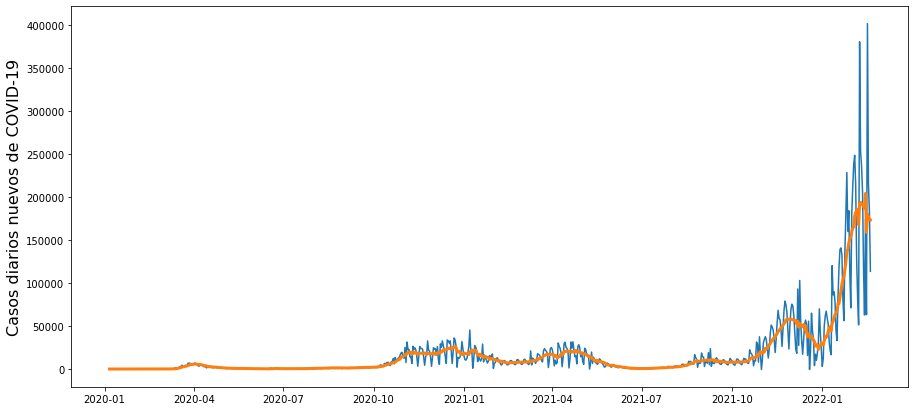

In [67]:
#Visualización 1
Filtro=RESUMEN[RESUMEN['location']==Pais]
plt.figure(figsize=(15,7))
plt.plot(Filtro['date'],Filtro['new_cases'])
plt.plot(Filtro['date'],Filtro['Casos_media_7'],linewidth=3.0)
plt.ylabel("Casos diarios nuevos de COVID-19", size = 16,)

Text(0, 0.5, 'Muertes diarias nuevos de COVID-19')

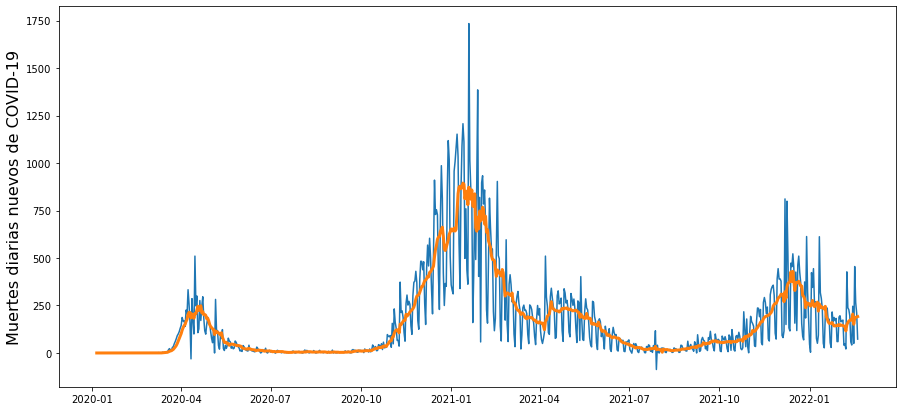

In [68]:
#Visualización 2
Filtro=RESUMEN[RESUMEN['location']==Pais]
plt.figure(figsize=(15,7))
plt.plot(Filtro['date'],Filtro['new_deaths'])
plt.plot(Filtro['date'],Filtro['Muertes_media_7'],linewidth=3.0)
plt.ylabel("Muertes diarias nuevos de COVID-19", size = 16,)

In [69]:
#En casos de valores negativos que pueda haber por cualquier motivo en los datos originales los trunca a 0
v=[]
for i in RESUMEN['Casos_media_7']:
    if i<0:
        a=0
    else:
        a=i
    v=v+[a]
RESUMEN['Casos_media_7']=pd.array(v)
w=[]
for i in RESUMEN['Muertes_media_7']:
    if i<0:
        a=0
    else:
        a=i
    w=w+[a]
RESUMEN['Muertes_media_7']=pd.array(w)

In [70]:
#Coge el dataset final con los datos que nos intenresan 
FINAL=pd.DataFrame({'Pais':RESUMEN['location']})
FINAL['Fecha']=RESUMEN['date']
FINAL['Casos_media_7_dias']=RESUMEN['Casos_media_7']
FINAL['Muertes_media_7_dias']=RESUMEN['Muertes_media_7']
FINAL['Porcentaje_vacunacion']=RESUMEN['people_fully_vaccinated']/RESUMEN['population']*100
FINAL['Poblacion']=RESUMEN['population']

In [71]:
FINAL

,Pais,Fecha,Casos_media_7_dias,Muertes_media_7_dias,Porcentaje_vacunacion,Poblacion
19823,Austria,2020-01-06,0.000000,0.000000,0.000000,9043072.0
19817,Austria,2020-01-07,0.000000,0.000000,0.000000,9043072.0
19815,Austria,2020-01-08,0.000000,0.000000,0.000000,9043072.0
19791,Austria,2020-01-09,0.000000,0.000000,0.000000,9043072.0
19777,Austria,2020-01-10,0.000000,0.000000,0.000000,9043072.0
...,...,...,...,...,...,...
19770,Sweden,2022-02-15,7803.714286,47.857143,74.366011,10160159.0
19771,Sweden,2022-02-16,5975.142857,51.142857,74.393265,10160159.0
19772,Sweden,2022-02-17,4136.428571,53.285714,74.429593,10160159.0
19773,Sweden,2022-02-18,3646.571429,50.142857,74.469907,10160159.0


In [72]:
#Guarda los datos
FINAL.to_csv(r'C:\Users\borja\Desktop\TODO\Mi_escritorio\Master\Semestre_2\TFM\TFm\Data\Datos_procesados.csv',sep=';')